# Titanic survival prediction

Lets's start by trying to study the data and the raltions the target attribute has with the predictive attributes. 

In [136]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler


In [137]:
test = pd.read_csv('input_data\\test.csv')
train = pd.read_csv('input_data\\train.csv')

In [138]:
print(train.columns)
train.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can be pretty sure that the person's name will not influence its probability of surviving, so let's drop that column. 

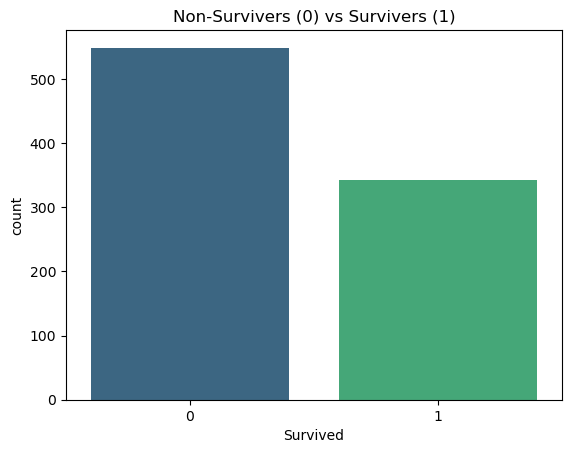

In [139]:

sns.countplot(x='Survived',hue='Survived', legend=False, data=train, palette='viridis')
plt.title("Non-Survivers (0) vs Survivers (1)")
plt.show()

#pretty balanced dataset, that's good

Sex
female    314
male      577
Name: Survived, dtype: int64
Percentage of survivals per gender: 
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


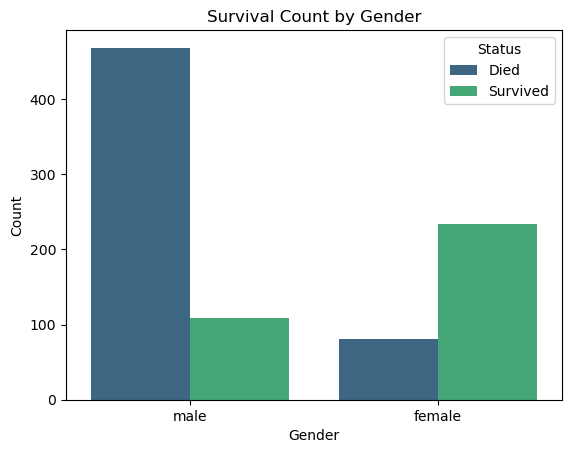

In [140]:
n = train.groupby('Sex')['Survived']
print(n.size())
print(f"Percentage of survivals per gender: \n {n.mean() * 100}")

sns.countplot(x='Sex', hue='Survived', data=train, palette='viridis')

plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Died', 'Survived']) 
plt.show()

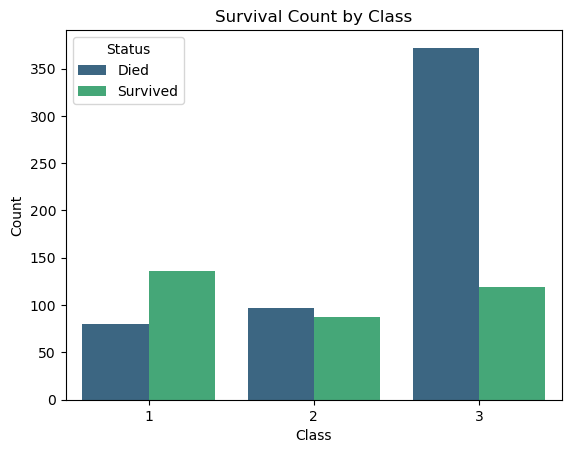

Percentage of survivors per class: 
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
Percentage of passengers per class: 
 Pclass
1    24.242424
2    20.650954
3    55.106622
dtype: float64


In [141]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='viridis')

plt.title('Survival Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Died', 'Survived']) 
plt.show()

print(f"Percentage of survivors per class: \n {train.groupby('Pclass')['Survived'].mean() *100}")

print(f"Percentage of passengers per class: \n {train.groupby('Pclass').size()/  train.shape[0] * 100}")

Interesting that even though the 3rd class made up more than half of the passengers, they still have the lowest survival percentage. 

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_3352\3422365814.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train, x='Age', fill=True, common_norm=False, palette='viridis')


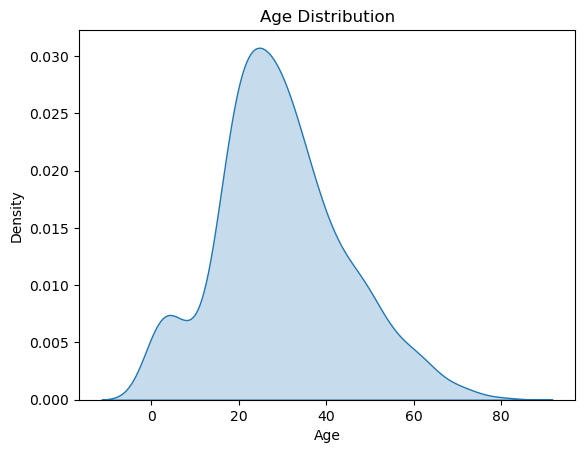

In [142]:
sns.kdeplot(data=train, x='Age', fill=True, common_norm=False, palette='viridis')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

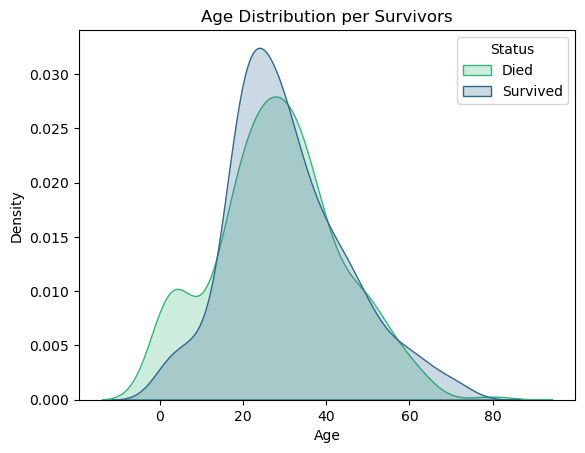

In [143]:
sns.kdeplot(data=train, x='Age', hue='Survived', fill=True, common_norm=False, palette='viridis')

plt.title('Age Distribution per Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Status', labels=['Died', 'Survived'])
plt.show()

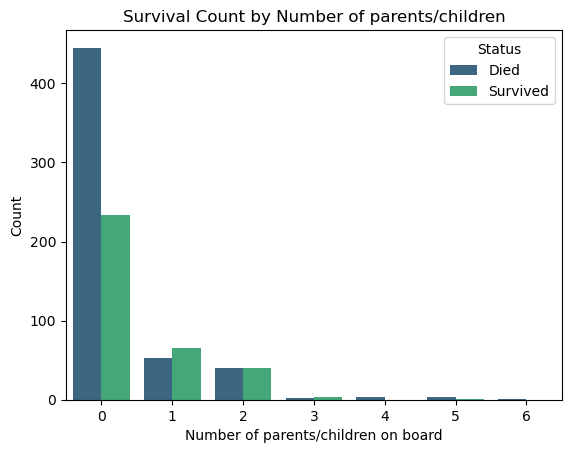

Count of people with different parents/children number: 
 Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64
Percentage of survivors per number: 
 Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64
Percentage of passengers per number: 
 Parch
0    76.094276
1    13.243547
2     8.978676
3     0.561167
4     0.448934
5     0.561167
6     0.112233
dtype: float64


In [144]:
sns.countplot(x='Parch', hue='Survived', data=train, palette='viridis')

plt.title('Survival Count by Number of parents/children')
plt.xlabel('Number of parents/children on board')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Died', 'Survived']) 
plt.show()

print(f"Count of people with different parents/children number: \n {train.groupby('Parch').size()}")

print(f"Percentage of survivors per number: \n {train.groupby('Parch')['Survived'].mean() *100}")

print(f"Percentage of passengers per number: \n {train.groupby('Parch').size()/  train.shape[0] * 100}")

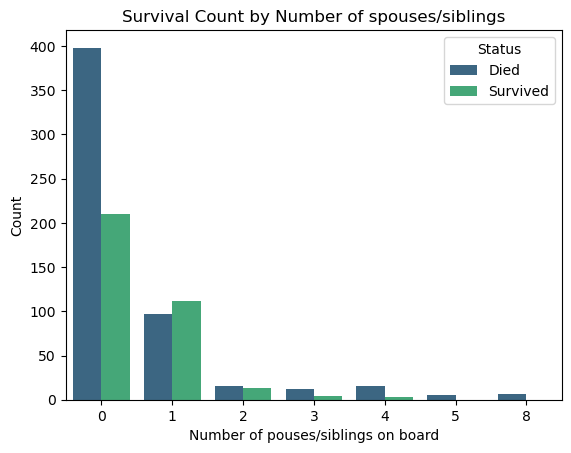

Count of people with different parents/children number: 
 SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64
Percentage of survivors per number: 
 SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64
Percentage of passengers per numer: 
 SibSp
0    68.237935
1    23.456790
2     3.142536
3     1.795735
4     2.020202
5     0.561167
8     0.785634
dtype: float64


In [145]:
sns.countplot(x='SibSp', hue='Survived', data=train, palette='viridis')

plt.title('Survival Count by Number of spouses/siblings')
plt.xlabel('Number of pouses/siblings on board')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Died', 'Survived']) 
plt.show()

print(f"Count of people with different parents/children number: \n {train.groupby('SibSp').size()}")

print(f"Percentage of survivors per number: \n {train.groupby('SibSp')['Survived'].mean() *100}")

print(f"Percentage of passengers per numer: \n {train.groupby('SibSp').size()/  train.shape[0] * 100}")

For the big number of children/parents, since there's so little cases, the results should not be very explanatory.  


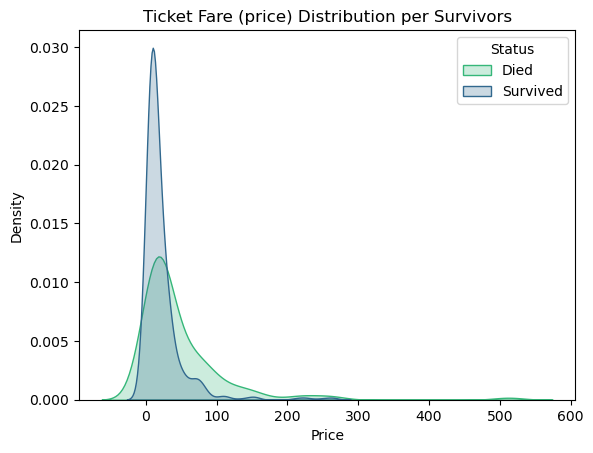

In [146]:
sns.kdeplot(data=train, x='Fare', hue='Survived', fill=True, common_norm=False, palette='viridis')

plt.title('Ticket Fare (price) Distribution per Survivors')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Status', labels=['Died', 'Survived'])
plt.show()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64
Percentage of survivals per embarkment location: 
 Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


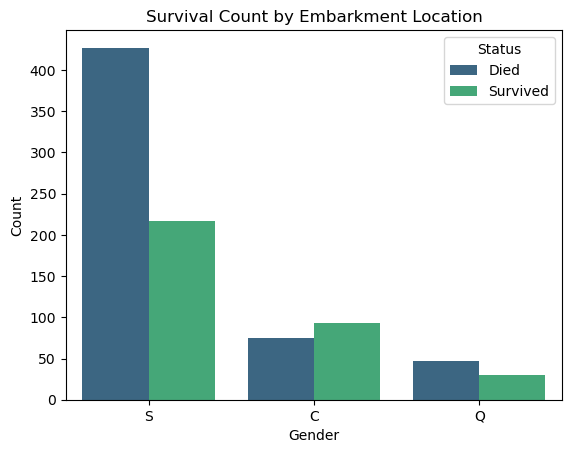

In [147]:
n = train.groupby('Embarked')['Survived']
print(n.size())
print(f"Percentage of survivals per embarkment location: \n {n.mean() * 100}")

sns.countplot(x='Embarked', hue='Survived', data=train, palette='viridis')

plt.title('Survival Count by Embarkment Location')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Died', 'Survived']) 
plt.show()

### Data engineering

Let's now try to tackle the data attributes and prepare them to be used by the model. 

In [148]:
print(f" Data Types: \n{train.dtypes}")

print(f" NA values per column: \n{train.isna().sum()}")
print(f"Total of rows: {train.shape}")

 Data Types: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
 NA values per column: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total of rows: (891, 12)


We can be pretty sure that the person's name, ticket number and cabin will not influence its probability of surviving, so let's drop those columns. 

We can simply impute the Embarked most frequent value in the nan, since theyre only 2 rows. 

Now for Sex and Embarked, who have only 2 and 3 possible values, we can encode them without increasing the dimensionality a lot.

In [149]:
imputer_embarked = SimpleImputer(strategy='most_frequent')
train['Embarked'] = imputer_embarked.fit_transform(train[['Embarked']]).ravel()
categorical_cols = ['Sex', 'Embarked']

ct = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, ), categorical_cols)
], remainder='passthrough', verbose_feature_names_out=False) 

ct.set_output(transform='pandas')
train_encoded = ct.fit_transform(train)

train_encoded.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
(train_encoded.head())

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,1,0,3,22.0,1,0,7.2500
1,1.0,0.0,1.0,0.0,0.0,2,1,1,38.0,1,0,71.2833
2,1.0,0.0,0.0,0.0,1.0,3,1,3,26.0,0,0,7.9250
3,1.0,0.0,0.0,0.0,1.0,4,1,1,35.0,1,0,53.1000
4,0.0,1.0,0.0,0.0,1.0,5,0,3,35.0,0,0,8.0500


In [150]:
print(f" Data Types: \n{train_encoded.dtypes}")

print(f" NA values per column: \n{train_encoded.isna().sum()}")
print(f"Total of rows: {train_encoded.shape}")

 Data Types: 
Sex_female     float64
Sex_male       float64
Embarked_C     float64
Embarked_Q     float64
Embarked_S     float64
PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object
 NA values per column: 
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64
Total of rows: (891, 12)


Now we have all numerical columns but we still have 177 nan rows in age which is quite significant considering the total number of rows is 889!

Let's analyze better what can be inputed in these rows so that they are still used by our model.

There are many methods of imputation to be considered. The mean/median imputation is one of the most common. But for it to be the most adequate, the imputed variable should not be very highly correlated with any other variable, or some bias may arise. 

Let's check correlations then:

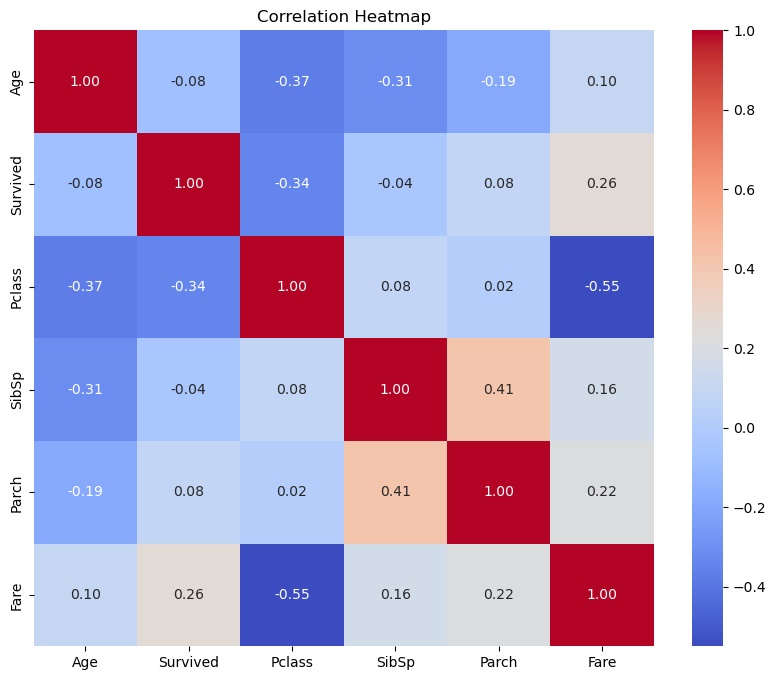

In [151]:
cols_to_check = ['Age', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']
corr_matrix = train[cols_to_check].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

There's some correlation between Age and Pclass/SibSp. The negative correlation indicates that as these grow (meaning, as the class is higher and the number of siblings and spouses goes up), the age tends to be smaller. So, younger people were generally in the 3rd/2nd classes and had more family members aboard.

One possible tatic to input in the data is the kNN. This method will take into account other characteristics of the missing Age rows, like Fare and Sex and will give an Age guess based on other similar passengers. Since this is a small dataset aswell, this technique won't be too computationally expensive. 

*Note:* Since knn is distance based, we should scale the numeric features so they don't overpower/are overpowered.

In [158]:
cols_to_scale = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

scaler = StandardScaler()
train_scaled = train_encoded.copy()
train_scaled[cols_to_scale] = scaler.fit_transform(train_encoded[cols_to_scale])

if 'PassengerId' in train_scaled.columns: #dropping this so it doesnt mess with calculations
    train_scaled.drop(columns=['PassengerId'], inplace=True)


imputer = KNNImputer(n_neighbors=5)
train_imputed = pd.DataFrame(imputer.fit_transform(train_scaled), columns=train_scaled.columns, index=train_scaled.index)

#back to normal scale

train_imputed[cols_to_scale] = scaler.inverse_transform(train_imputed[cols_to_scale])
train_results = train_imputed.pop('Survived')

train_imputed.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,3.0,35.0,0.0,0.0,8.0500


Let's remember that this should all be repicable so that we can apply it to the testing data later on. Let's then create a pipeline that combains all this engineering.

In [ ]:
#separating columns by type
num_cols = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Sex', 'Embarked']

#for numeric columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop', 
    verbose_feature_names_out=False
).set_output(transform='pandas')

pipeline_cleaning = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer_knn', KNNImputer(n_neighbors=5))
])

Now that our data is all ready, we can start applying models to make predictions.

Let's remember that this is a classification task! So, how can it be approached?

### Logistic Regression

This algorithm tries to model the classification of the different events (in this case, passengers) by finding an equation that separates the two variables, using the predictive attribute values. So, in this case, this model will find numerical parameters where we can apply the different values of Pclass, Age, Fare, etc... and get the output on a 0-1 scale. We'll assume that, if the value is bigger than 0.5, then the passenger is predicted as having survived and, otherwise, has not having survived. 



In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Models to try:
* logistic regression
* Knn
* decision tree
* random forest
* xgboost